In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [173]:
data=pd.read_csv(r'C:\Users\Arun\Desktop\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory Data Analysis

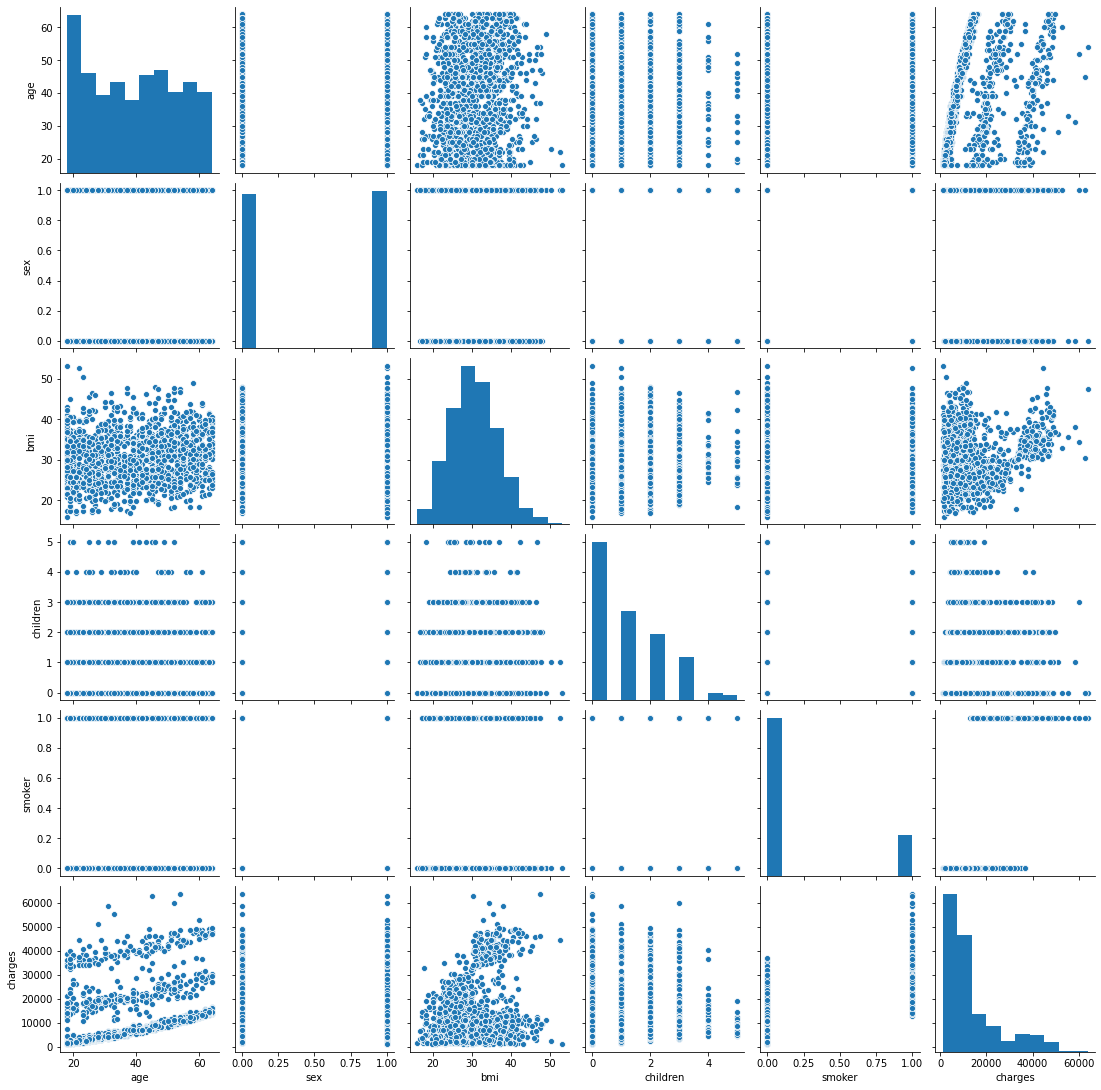

In [37]:
sns.pairplot(data)

In [55]:
#Let's analyse discrete features
discrete_feature=[feature for feature in data.columns if data[feature].dtype=='O']

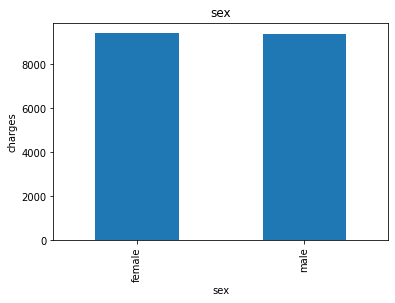

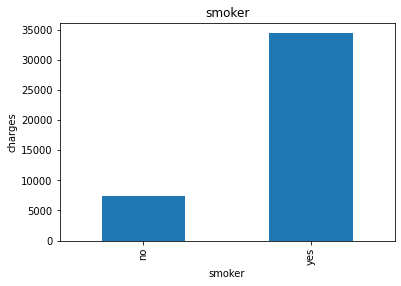

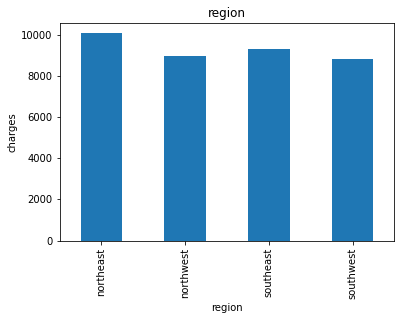

In [56]:
for feature in discrete_feature:
    data.groupby(feature)['charges'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.title(feature)
    plt.show()

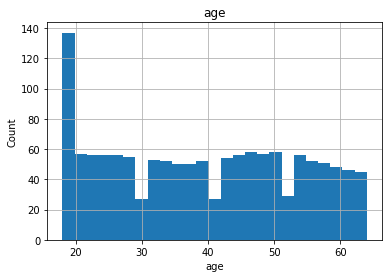

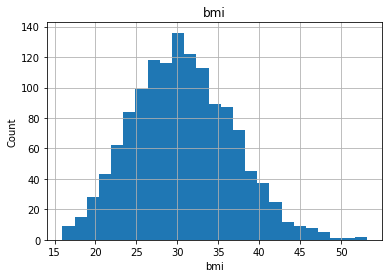

In [58]:
## Lets analyse the continuous values by creating histograms to understand the distribution
continuous_feature=data[['age','bmi']]
for feature in continuous_feature:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

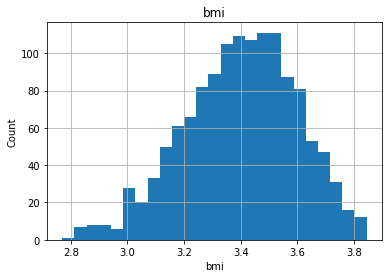

In [72]:
#Applying log for the feature
data=data.copy()
data['bmi']=np.log(data['bmi'])
data['bmi'].hist(bins=25)
plt.xlabel('bmi')
plt.ylabel("Count")
plt.title('bmi')
plt.show()

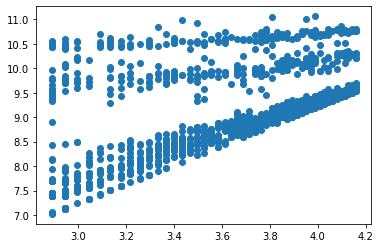

In [60]:
plt.scatter(np.log(data['age']), np.log(data['charges']))
plt.show()

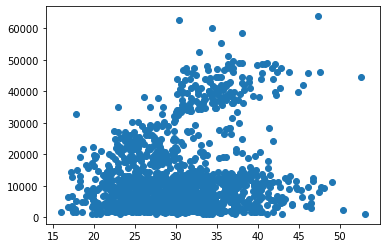

In [62]:
plt.scatter(data['bmi'], data['charges'])
plt.show()

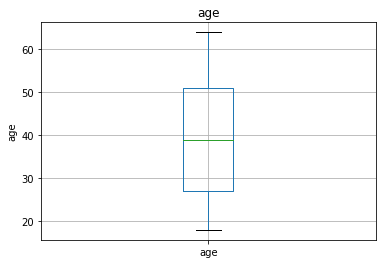

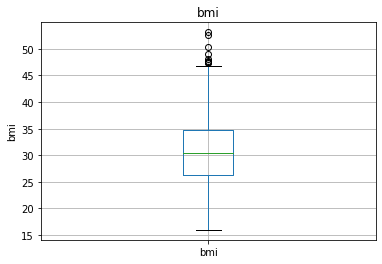

In [66]:
#Finding the outliers
for feature in continuous_feature:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [174]:
#Removing the outliers using interquantile range
q75,q25 = np.percentile(data['bmi'],[75,25])
iqr=q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(min)
print(max)

data=data.drop(data[data['bmi']<min].index)
data=data.drop(data[data['bmi']>max].index)

13.7
47.290000000000006


In [175]:
data['smoker']=data['smoker'].map({'yes' : 1, 'no' : 0})
data['sex']=data['sex'].map({'male' : 1, 'female' : 0})

In [176]:
region=pd.get_dummies(data['region'])
data=pd.concat([data, region], axis=1)

In [177]:
data.drop(['region'], axis=1, inplace=True)

In [178]:
y=data['charges']
x=data.drop(['charges'],axis=1)

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

In [181]:
import statsmodels.api as sm

In [182]:
sm.add_constant(x_train)

,const,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
589,1.0,38,0,30.690,1,0,0,0,1,0
919,1.0,35,0,34.210,1,0,0,0,1,0
108,1.0,29,1,27.940,0,0,0,0,1,0
1299,1.0,19,0,25.745,1,0,0,1,0,0
876,1.0,49,0,27.100,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1282,1.0,18,0,21.660,0,1,1,0,0,0
1056,1.0,48,0,28.900,0,0,0,0,0,1
1263,1.0,43,0,29.900,1,0,0,0,0,1
57,1.0,18,1,31.680,2,1,0,0,1,0


In [145]:
y_train

936    32108.66282
300     6746.74250
796     4266.16580
733     9447.25035
65      1743.21400
          ...     
331    24393.62240
973     1759.33800
388     3176.81590
971     4992.37640
741    18246.49550
Name: charges, Length: 936, dtype: float64

In [165]:
reg=sm.OLS(y_train, x_train).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     343.7
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          2.12e-270
Time:                        13:58:26   Log-Likelihood:                -9409.9
No. Observations:                 930   AIC:                         1.884e+04
Df Residuals:                     921   BIC:                         1.888e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.3932     14.251     17.991      0.0

In [166]:
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## Feature Scaling

In [185]:
#Scaling the feature and creating the model again
feature=data.columns
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [184]:
scaler.transform(data)

array([[0.02173913, 0.        , 0.38778824, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.57843456, ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 1.        , 0.55342644, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.67846703, ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.        , 0.31958428, ..., 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.        , 0.42578759, ..., 1.        , 0.        ,
        0.        ]])

In [186]:
# transform the data
data = pd.DataFrame(scaler.transform(data), columns=feature)

In [187]:
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,0.021739,0.0,0.387788,0.0,1.0,0.256431,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.578435,0.2,0.0,0.009821,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.553426,0.6,0.0,0.054133,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.219065,0.0,0.0,0.339389,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.419617,0.0,0.0,0.044655,0.0,1.0,0.0,0.0


In [188]:
y=data['charges']
x=data.drop(['charges'],axis=1)

In [189]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

In [190]:
reg=sm.OLS(y_train, x_train).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     364.0
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          4.61e-279
Time:                        14:03:05   Log-Likelihood:                 859.20
No. Observations:                 930   AIC:                            -1700.
Df Residuals:                     921   BIC:                            -1657.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1948      0.011     18.435      0.0

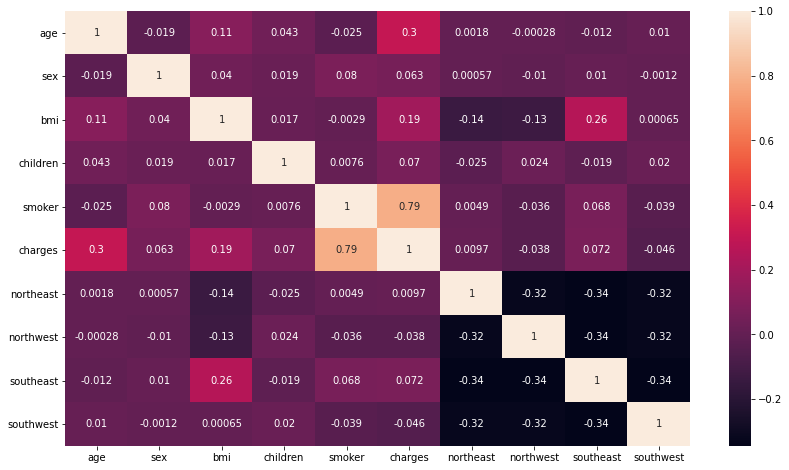

In [194]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True)

In [195]:
y_pred=reg.predict(x_test)

## Model Evaluation

In [221]:
#Parameters for each features
reg.params

age          0.194763
sex         -0.000521
bmi          0.177171
children     0.026639
smoker       0.386868
northeast   -0.048264
northwest   -0.062517
southeast   -0.074722
southwest   -0.065598
dtype: float64

Text(0, 0.5, 'Charges')

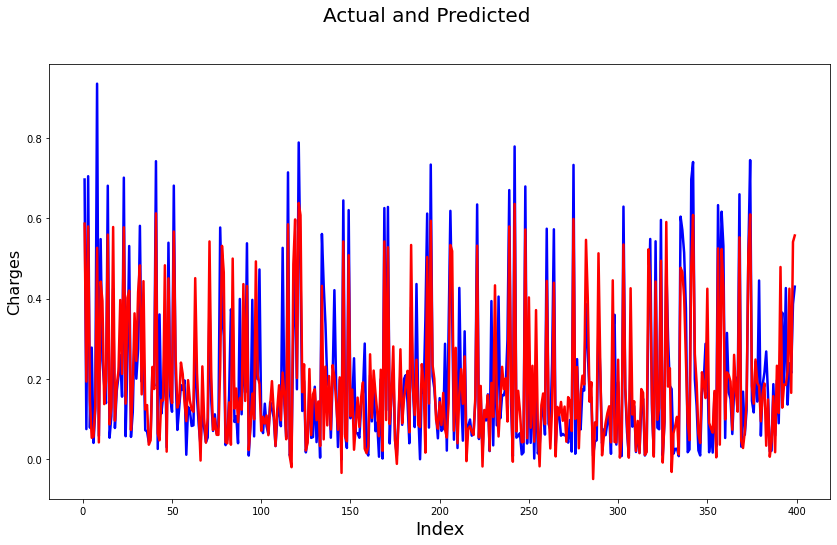

In [204]:
# Actual vs Predicted
c = [i for i in range(1,400,1)]
fig = plt.figure(figsize=(14,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Charges', fontsize=16)                       # Y-label

In [196]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.10143195921817107


In [205]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.7237122039821209


### Applying the Feature Selection and evaluating the model again

In [206]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [207]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [208]:
feature_sel_model.get_support()

array([ True, False,  True, False,  True, False, False, False, False])

In [212]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 9
selected features: 3


In [213]:
selected_feat

Index(['age', 'bmi', 'smoker'], dtype='object')

In [214]:
x_train=x_train[selected_feat]
x_train.head()

,age,bmi,smoker
921,0.847826,0.134459,0.0
693,0.500000,0.642741,1.0
1291,0.021739,0.317798,0.0
77,0.065217,0.635596,0.0
1047,0.195652,0.178954,0.0


In [216]:
reg1=sm.OLS(y_train, x_train).fit()
print(reg1.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              2129.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:47:17   Log-Likelihood:                          836.93
No. Observations:                 930   AIC:                                     -1668.
Df Residuals:                     927   BIC:                                     -1653.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [217]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.10143195921817107


In [218]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.7237122039821209


In [ ]:
#There is no change in the performance as the other features are not that much impacting the model 